Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

Read the dataset into pandas dataframe

In [3]:
df2 = pd.read_csv('/content/Pre Processing.csv')
df2.head()

,ModuleCode,ModuleTitle,SessionName,ApplicantName,CGPA,CGPA.1,AttemptCount,AttemptCount.1,RemoteStudent,Probation,...,ESE.1,Online C,Online C.1,Online O,Online O.1,Played,Paused,Likes,Segment,Result
0,Module 2,Course 2,Session-A,Student 1,Very Good,3.50,1,Low,No,No,...,Adequate,239,Very Good,301,Excellent,3,1,2,2,Pass
1,Module 2,Course 2,Session-A,Student 2,Fair,2.25,1,Low,No,No,...,Adequate,18,Poor,13,Poor,1,0,0,0,Pass
2,Module 2,Course 2,Session-A,Student 3,Fair,2.50,1,Low,No,No,...,Fail,54,Fair,249,Very Good,2,2,1,1,Pass
3,Module 2,Course 2,Session-A,Student 4,Adequate,1.75,1,Low,No,No,...,Fail,253,Very Good,90,Fair,3,1,1,2,Pass
4,Module 2,Course 2,Session-A,Student 5,Fair,2.50,1,Low,No,No,...,Adequate,77,Fair,241,Very Good,8,13,1,7,Pass


Get average info about dataframe columns

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ModuleCode           326 non-null    object 
 1   ModuleTitle          326 non-null    object 
 2   SessionName          326 non-null    object 
 3   ApplicantName        326 non-null    object 
 4   CGPA                 326 non-null    object 
 5   CGPA.1               324 non-null    float64
 6   AttemptCount         326 non-null    int64  
 7   AttemptCount.1       326 non-null    object 
 8   RemoteStudent        326 non-null    object 
 9   Probation            326 non-null    object 
 10  HighRisk             326 non-null    object 
 11  TermExceeded         326 non-null    object 
 12  AtRisk               326 non-null    object 
 13  AtRiskSSC            326 non-null    object 
 14  OtherModules         326 non-null    int64  
 15  OtherModules.1       326 non-null    obj

Show null or NaN values by dataframe columns

In [5]:
df2.isna().sum()

ModuleCode             0
ModuleTitle            0
SessionName            0
ApplicantName          0
CGPA                   0
CGPA.1                 2
AttemptCount           0
AttemptCount.1         0
RemoteStudent          0
Probation              0
HighRisk               0
TermExceeded           0
AtRisk                 0
AtRiskSSC              0
OtherModules           0
OtherModules.1         0
PlagiarismHistory      0
PlagiarismHistory.1    0
CW1                    0
CW1.1                  0
CW2                    0
CW2.1                  0
ESE                    0
ESE.1                  0
Online C               0
Online C.1             0
Online O               0
Online O.1             0
Played                 0
Paused                 0
Likes                  0
Segment                0
Result                 0
dtype: int64

The dataset is imbalanced - 264 **Passed** vs 62 **Failed**

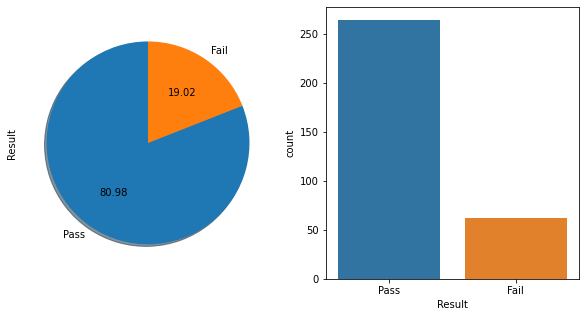

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df2["Result"].value_counts().plot(kind="pie",autopct="%.2f",shadow=True, startangle=90)

plt.subplot(1,2,2)
sns.countplot(df2["Result"])

plt.show()

Show the data ditribution by columns

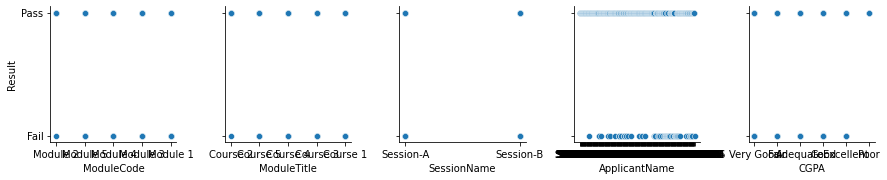

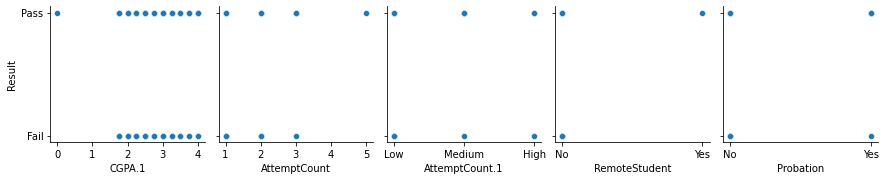

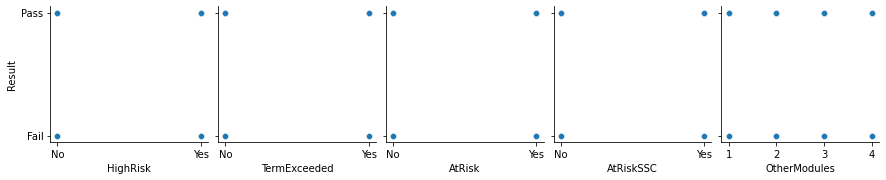

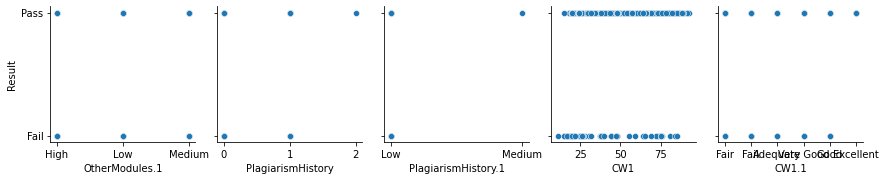

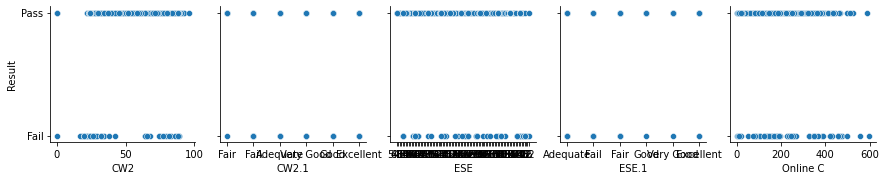

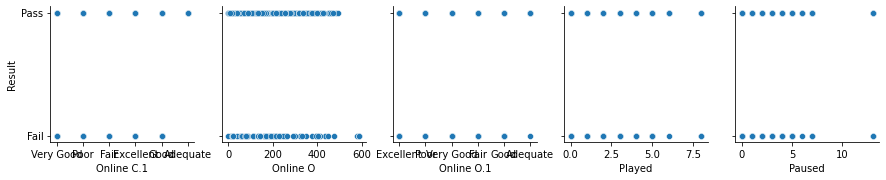

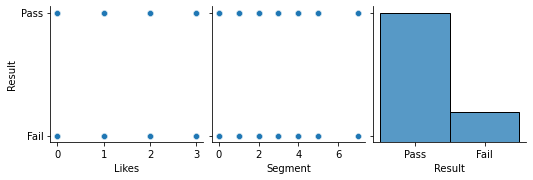

In [7]:
for i in range(0, len(df2.columns), 5):
    sns.pairplot(data=df2,
                x_vars=df2.columns[i:i+5],
                y_vars=['Result'])

Show numerical features

In [8]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CGPA.1,324.0,2.468364,0.611394,0.0,2.00,2.25,3.000,4.0
AttemptCount,326.0,1.116564,0.405996,1.0,1.00,1.00,1.000,5.0
OtherModules,326.0,2.644172,0.757981,1.0,2.00,3.00,3.000,4.0
PlagiarismHistory,326.0,0.180982,0.393494,0.0,0.00,0.00,0.000,2.0
CW1,326.0,51.095736,22.477510,11.0,28.25,50.58,71.795,92.7
CW2,326.0,50.082301,23.498418,0.0,29.00,44.00,72.365,96.0
Online C,326.0,208.352761,124.017796,2.0,115.50,188.00,292.000,597.0
Online O,326.0,194.975460,131.131265,0.0,86.00,184.00,283.000,587.0
Played,326.0,2.131902,1.760532,0.0,1.00,1.00,3.000,8.0
Paused,326.0,2.184049,2.603522,0.0,0.00,1.00,4.000,13.0


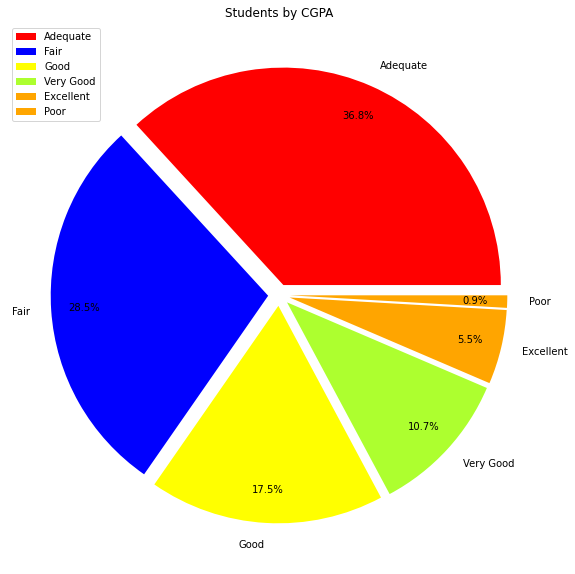

In [9]:
plt.figure(figsize=(15,10))
sizes = df2["CGPA"].value_counts().tolist()
labels = df2["CGPA"].value_counts().index.tolist()
  
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500', '#FFA600']
  
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
  
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, 
        explode=explode)
  
centre_circle = plt.Circle((5, 5), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
  
plt.title('Students by CGPA')
  
plt.legend(labels, loc="best")
  
plt.show()

Count average results of students by attempt

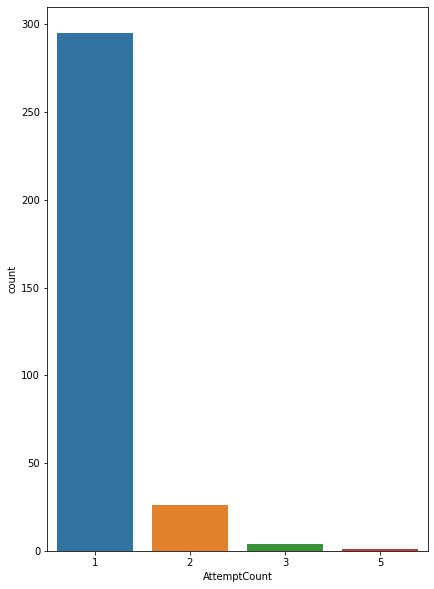

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(df2["AttemptCount"])

plt.show()

Share of students' CGPA score by course

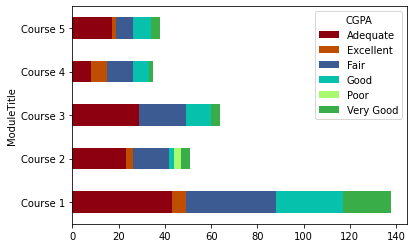

In [11]:
cross_tab_Q1_group = pd.crosstab([df2.ModuleTitle], [df2.CGPA])
cross_tab_Q1_group.head()
cross_tab_Q1_group.plot(kind="barh", stacked=True, color=[
    sns.xkcd_rgb["crimson"],
    sns.xkcd_rgb["burnt orange"],
    sns.xkcd_rgb["denim blue"],
    sns.xkcd_rgb["turquoise"],
    sns.xkcd_rgb["spring green"], 
    sns.xkcd_rgb['medium green'], 
])

Students attention on the courses (video material how many times played, paused, segment)

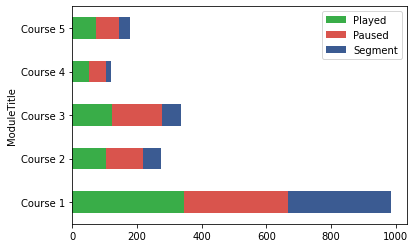

In [12]:
cross_tab_Q1_group = df2.groupby(by=['ModuleTitle'])['Played','Paused','Segment'].sum()
cross_tab_Q1_group.plot(kind="barh", stacked=True, color=[
    sns.xkcd_rgb['medium green'], 
    sns.xkcd_rgb["pale red"], 
    sns.xkcd_rgb["denim blue"],
    sns.xkcd_rgb["turquoise"],
    sns.xkcd_rgb["crimson"],
    sns.xkcd_rgb["burnt orange"]],
)


Removing unnecessary features from dataframe

In [13]:
df2.drop(['ModuleCode', 'ESE', 'ModuleTitle', 'RemoteStudent', 'Segment', 'Likes', 'SessionName', 'OtherModules', 'ApplicantName', 'PlagiarismHistory', 'CW1', 'CW2', 'CGPA.1', 'AttemptCount.1', 'Online C', 'Online O'], axis=1, inplace=True)

In [14]:
print(df2.select_dtypes(include=['object']).columns)
print(df2.columns)
df2.head()

Index(['CGPA', 'Probation', 'HighRisk', 'TermExceeded', 'AtRisk', 'AtRiskSSC',
       'OtherModules.1', 'PlagiarismHistory.1', 'CW1.1', 'CW2.1', 'ESE.1',
       'Online C.1', 'Online O.1', 'Result'],
      dtype='object')
Index(['CGPA', 'AttemptCount', 'Probation', 'HighRisk', 'TermExceeded',
       'AtRisk', 'AtRiskSSC', 'OtherModules.1', 'PlagiarismHistory.1', 'CW1.1',
       'CW2.1', 'ESE.1', 'Online C.1', 'Online O.1', 'Played', 'Paused',
       'Result'],
      dtype='object')


,CGPA,AttemptCount,Probation,HighRisk,TermExceeded,AtRisk,AtRiskSSC,OtherModules.1,PlagiarismHistory.1,CW1.1,CW2.1,ESE.1,Online C.1,Online O.1,Played,Paused,Result
0,Very Good,1,No,No,No,No,No,High,Low,Fair,Fair,Adequate,Very Good,Excellent,3,1,Pass
1,Fair,1,No,No,No,No,No,High,Low,Fair,Fair,Adequate,Poor,Poor,1,0,Pass
2,Fair,1,No,No,No,No,No,Low,Low,Fail,Fail,Fail,Fair,Very Good,2,2,Pass
3,Adequate,1,No,No,No,No,No,High,Low,Adequate,Adequate,Fail,Very Good,Fair,3,1,Pass
4,Fair,1,No,No,No,No,No,Medium,Low,Adequate,Adequate,Adequate,Fair,Very Good,8,13,Pass


Feature encoding library

In [15]:
!pip install category-encoders

     |████████████████████████████████| 86 kB 3.1 MB/s 


Encode the categorical features using OneHot and Ordinal encoding

In [16]:
import category_encoders as ce

ordinal_encoder = ce.OrdinalEncoder(cols=[
       'CGPA', 
       'OtherModules.1', 'CW1.1', 'CW2.1', 'ESE.1', 'PlagiarismHistory.1',
       'Online C.1', 'Online O.1', 
])

one_hot_encoder = ce.OneHotEncoder(cols=[
    'Probation', 'HighRisk', 'TermExceeded', 'AtRisk', 'AtRiskSSC',
])

df2 = ordinal_encoder.fit_transform(df2)
df2 = one_hot_encoder.fit_transform(df2)
df2

,CGPA,AttemptCount,Probation_1,Probation_2,HighRisk_1,HighRisk_2,TermExceeded_1,TermExceeded_2,AtRisk_1,AtRisk_2,...,OtherModules.1,PlagiarismHistory.1,CW1.1,CW2.1,ESE.1,Online C.1,Online O.1,Played,Paused,Result
0,1,1,1,0,1,0,1,0,1,0,...,1,1,1,1,1,1,1,3,1,Pass
1,2,1,1,0,1,0,1,0,1,0,...,1,1,1,1,1,2,2,1,0,Pass
2,2,1,1,0,1,0,1,0,1,0,...,2,1,2,2,2,3,3,2,2,Pass
3,3,1,1,0,1,0,1,0,1,0,...,1,1,3,3,2,1,4,3,1,Pass
4,2,1,1,0,1,0,1,0,1,0,...,3,1,3,3,1,3,3,8,13,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2,1,1,0,1,0,1,0,1,0,...,1,1,3,2,2,1,1,5,2,Pass
322,3,5,0,1,0,1,1,0,0,1,...,2,1,3,2,4,2,1,1,5,Pass
323,3,1,1,0,1,0,1,0,1,0,...,1,1,3,2,1,4,1,1,3,Pass
324,4,1,1,0,1,0,1,0,0,1,...,2,1,3,2,1,5,3,0,3,Pass


Build a correlation matrix to monitor a multicollinearity

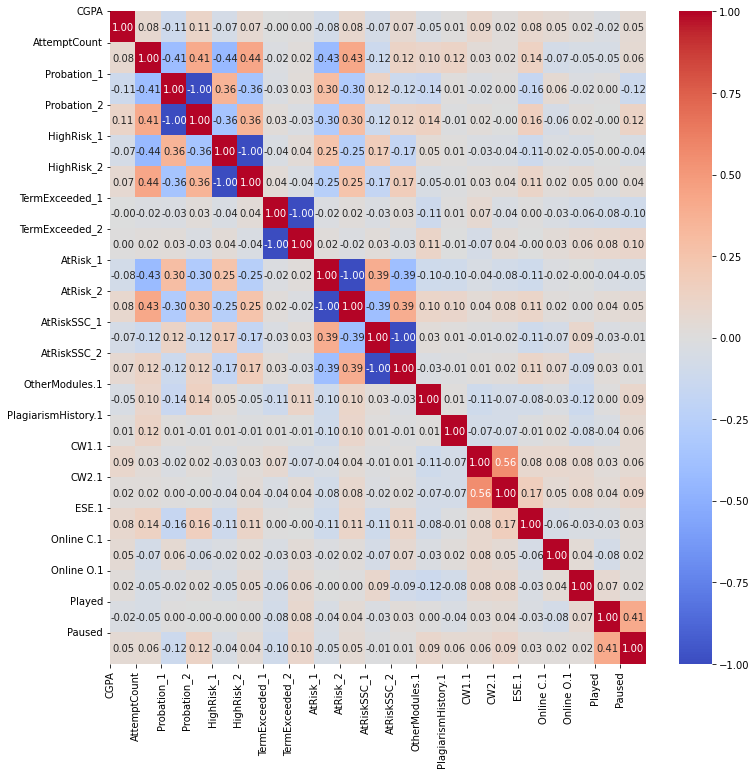

In [17]:
corr = df2.corr()

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Encoding labels of **Result** column

In [18]:
le = LabelEncoder()
df2['Result'] = le.fit_transform(df2['Result'])

Split dataset into X and y data

In [19]:
X = df2.drop(['Result'], axis=1)

y = df2['Result']

In [20]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 5.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


# Decision Tree Classifier

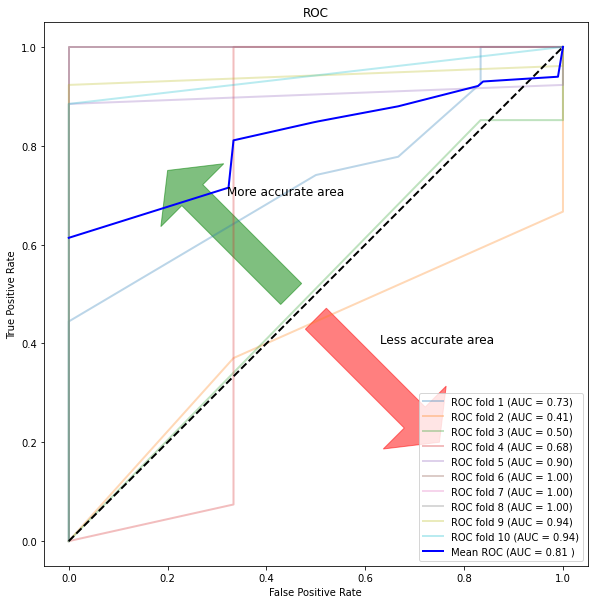

In [21]:
from imblearn.over_sampling import SMOTE
from subprocess import check_output

fig1 = plt.figure(figsize=[10, 10])
ax1 = fig1.add_subplot(111, aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

clf_gini = DecisionTreeClassifier(max_depth=5)
cv = StratifiedKFold(n_splits=10,shuffle=False)
over_sampler = SMOTE(random_state=42)

for train, test in cv.split(X,y):
    X_resampled, y_resampled = over_sampler.fit_resample(X.iloc[train],y.iloc[train])
    prediction = clf_gini.fit(X_resampled, y_resampled).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [22]:
df2.head()

,CGPA,AttemptCount,Probation_1,Probation_2,HighRisk_1,HighRisk_2,TermExceeded_1,TermExceeded_2,AtRisk_1,AtRisk_2,...,OtherModules.1,PlagiarismHistory.1,CW1.1,CW2.1,ESE.1,Online C.1,Online O.1,Played,Paused,Result
0,1,1,1,0,1,0,1,0,1,0,...,1,1,1,1,1,1,1,3,1,1
1,2,1,1,0,1,0,1,0,1,0,...,1,1,1,1,1,2,2,1,0,1
2,2,1,1,0,1,0,1,0,1,0,...,2,1,2,2,2,3,3,2,2,1
3,3,1,1,0,1,0,1,0,1,0,...,1,1,3,3,2,1,4,3,1,1
4,2,1,1,0,1,0,1,0,1,0,...,3,1,3,3,1,3,3,8,13,1


# Random Forest Classifier

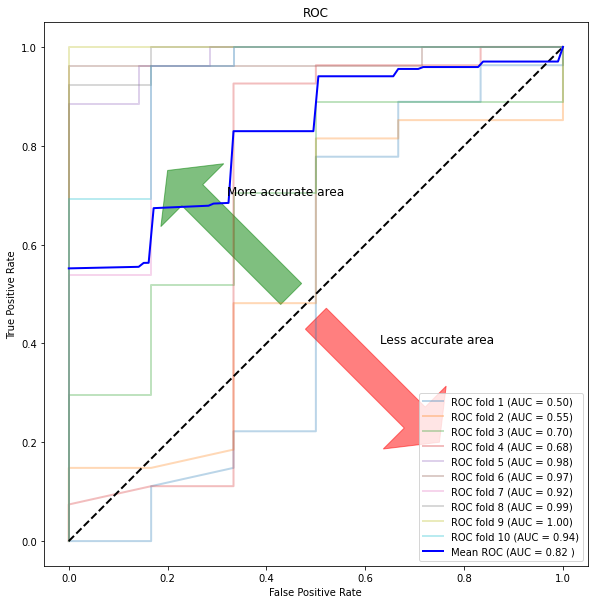

In [23]:
fig1 = plt.figure(figsize=[10, 10])
ax1 = fig1.add_subplot(111, aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

classifier_rf = RandomForestClassifier(criterion = 'gini', max_features='auto', n_estimators = 500, random_state=33)
cv = StratifiedKFold(n_splits=10,shuffle=False)
smote_sampler = SMOTE(random_state=42)

for train, test in cv.split(X,y):
    X_resampled, y_resampled = smote_sampler.fit_resample(X.iloc[train],y.iloc[train])
    prediction = classifier_rf.fit(X_resampled, y_resampled).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

Oversampling method for imbalanced dataset

In [24]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X, y)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y)}")

Training target statistics: Counter({1: 264, 0: 264})
Testing target statistics: Counter({1: 264, 0: 62})


**Mean ROC AUC score** & **test average precision** indicators after random oversampling

In [25]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_validate

oversample_pipe_rf = make_imb_pipeline(RandomOverSampler(),
                                       RandomForestClassifier())
scores = cross_validate(oversample_pipe_rf,
                        X, y, cv=cv,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.8479480396147062, 0.9477784155480009)

# Gradient Boosting Classifier

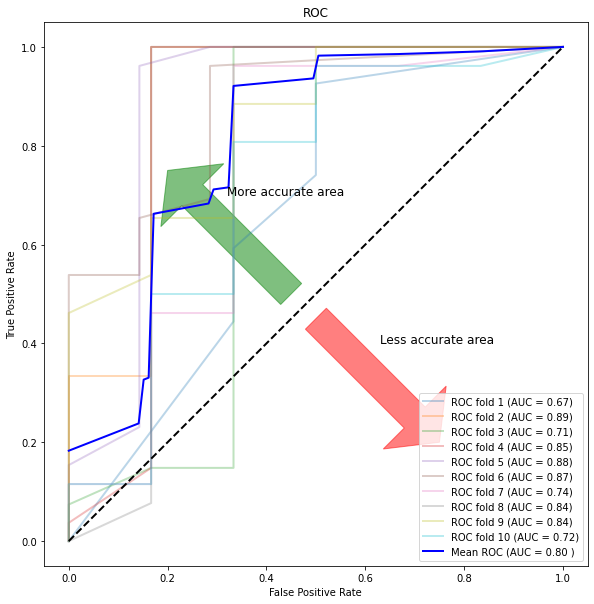

In [26]:
fig1 = plt.figure(figsize=[10, 10])
ax1 = fig1.add_subplot(111, aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

classifier_rf = GradientBoostingClassifier(n_estimators=600, learning_rate=0.001, max_depth=3, random_state=0)
cv = StratifiedKFold(n_splits=10,shuffle=True)
over_sampler = RandomOverSampler(random_state=42)

for train, test in cv.split(X,y):
    X_resampled, y_resampled = over_sampler.fit_resample(X.iloc[train],y.iloc[train])
    prediction = classifier_rf.fit(X_resampled, y_resampled).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()